In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression 

In [4]:
data = pd.read_csv('data.txt', header = None, names = ['Population', 'Profit'])

In [5]:
data.shape

(97, 2)

In [6]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


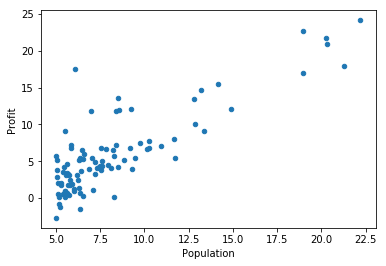

In [7]:
data.plot.scatter(x = 'Population', y = 'Profit')

* With the increase in population, profit increase
* Depicts positive linear relation 

In [8]:
alpha = 0.01 
iterations = 2000

In [9]:
x = data['Population']
y = data['Profit']
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [10]:
theta = np.random.rand(2)
m = y.size

In [11]:
def compute_cost(x, y, theta):
    prediction = np.dot(x, theta)
    error = prediction - y
    cost = 1/(2*m) * np.dot(error.T, error)
    return cost, error

* value of cost before gradient descent 

In [12]:
cost, _ = compute_cost(x,y,theta) 
print(cost)

25.730502827894252


In [13]:
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        cost,error = compute_cost(x,y,theta)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

In [14]:
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

In [15]:
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 5.84, 4.62


* cost after gradient descent

In [16]:
cost, _ = compute_cost(x,y,theta) 
print(cost)

4.476971375975179


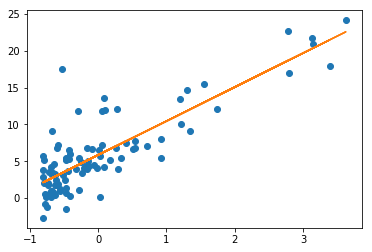

In [17]:
line = theta[1]*x + theta[0]
plt.scatter(x[:, 1],y)
plt.plot(x,line)
plt.show()

* Predicting the values 

In [18]:
pred1 = theta[1]*35000 + theta[0]
pred2 = theta[1]*70000 + theta[0]
pred1, pred2

(161597.3825129396, 323188.9258908377)

* Fitting the model using sklearn

In [20]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
model.intercept_

5.839135051546395

In [22]:
model.coef_

array([0.        , 4.61690125])

In [27]:
model.predict(np.array([1,35000]).reshape(1,-1))

array([161597.38281011])

In [28]:
model.predict(np.array([1,70000]).reshape(1,-1))

array([323188.92648516])